In [3]:
!pip3 install ultralytics

     -------------------------------------- 527.0/527.0 kB 2.2 MB/s eta 0:00:00
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
     ---------------------------------------- 1.2/1.2 MB 12.6 MB/s eta 0:00:00
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     ------------------------------------- 172.3/172.3 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 199.2/199.2 kB ? eta 0:00:00
     --------------------------------------- 11.3/11.3 MB 46.7 MB/s eta 0:00:00
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
     ------------------------------------- 341.8/341.8 kB 22.1 MB/s eta 0:00:00
     ------------------------------------- 502.3/502.3 kB 30.8 MB/s eta 0:00:00
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
     ---------------------------------------- 97.1/97.1 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 140.9/140.9 kB 8.2 MB/s eta 0:00:00
     --------------------------------------

In [11]:
!pip3 install scikit-image

     --------------------------------------- 23.9/23.9 MB 19.9 MB/s eta 0:00:00
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached scipy-1.9.1-cp39-cp39-win_amd64.whl (38.6 MB)
  Using cached imageio-2.27.0-py3-none-any.whl (3.4 MB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
     ---------------------------------------- 219.4/219.4 kB ? eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0


In [4]:
from ultralytics import YOLO
import pandas as pd
import numpy as np
import skimage.io as io
import os
import cv2
import matplotlib.pyplot as plt

Next two cells are for Leon's personal use (formatting an already formatted version of the CVC-Clinic DB) to conform to YOLOv8's requirements. The directory uploaded to Github should already be correct, so DO NOT RUN THE NEXT TWO CELLS. 

In [27]:
# Some definitions


# The correspondence between the number of frame and the video sequence is as follows: 

#        ----------------------------------
#        |                  |		     |
#        |   Frame Number   |  Sequence   |
#        |                  |		     |
#        ----------------------------------
#        |		     | 	     |
#        |      1 to  25    |	 1	     |
#        |     26 to  50    |	 2          |
#        |     51 to  67    |	 3 	     |
#        |     68 to  78    |	 4 	     |
#        |     79 to 103    |	 5 	     |
#        |    104 to 126    |	 6 	     |
#        |    127 to 151    |  7	     |
#        |    152 to 177    |	 8	     |
#        |    178 to 199    |	 9	     |
#        |    200 to 205    |	10	     |
#        |    206 to 227    |	11          |
#        |    228 to 252    |	12          |
#        |    253 to 277    |	13          |
#        |    278 to 297    |	14 	     |
#        |    298 to 317    |	15 	     |
#        |    318 to 342    | 16 	     |
#        |    343 to 363    |	17 	     |
#        |    364 to 383    | 18	     |
#        |    384 to 408    | 19	     |
#        |    409 to 428    | 20	     |
#        |    429 to 447    |	21	     |
#        |    448 to 466    |	22	     |
#        |    467 to 478    | 23	     |
#        |    479 to 503    | 24	     |
#        |    504 to 528    |	25	     |
#        |    529 to 546    |	26	     |
# 	|    547 to 571    | 27	     |
#        |    572 to 591    | 28	     |
#        |    592 to 612    |	29	     |
#        ----------------------------------
NUM_TRAIN = 428
NUM_VAL = 75
NUM_TEST = 109

In [82]:
# generate correct bounding boxes

# read in masks
for masked_img_file in os.listdir("datasets/CVC_ClinicDB/annotations/"):
    masked_img = io.imread("datasets/CVC_ClinicDB/annotations/"+masked_img_file)
    
    
    image_height = len(masked_img)
    image_width = len(masked_img[0])
       
        
    # There are some weird non 0, non 255 values that we get rid of
    # print(np.unique(masked_img))
    masked_img[masked_img < 255] = 0.
    pos = np.where(masked_img == 255)
    
    # can calculate position of bbox directly because only 1 polyp per video
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    
    # make sure bounding box works
    # masked_img[:, xmin, :] = 255
    # masked_img[:, xmax, :] = 255
    # masked_img[ymin, :, :] = 255
    # masked_img[ymax, :, :] = 255
    # io.imshow(masked_img)
    
    xcen = (xmin+xmax)/2
    ycen = (ymin+ymax)/2
    bbox_height = ymax-ymin
    bbox_width = xmax-xmin
    
    # normalize 
    xcen /= image_width
    ycen /= image_height
    bbox_width /= image_width
    bbox_height /= image_height
    
    
    file_num = int(masked_img_file[:-4])
    if file_num <= NUM_TRAIN:
        folder = "datasets/CVC_ClinicDB/labels/train2019/"
    elif file_num <= NUM_TRAIN+NUM_VAL:
        folder = "datasets/CVC_ClinicDB/labels/val2019/"
    else:
        folder = "datasets/CVC_ClinicDB/labels/test2019/"
        
    with open(folder+str(file_num)+".txt", "w") as new_file:
        new_file.write("0 " + str(xcen) + " " + str(ycen) + " " + str(bbox_width) + " " + str(bbox_height) + "\n")        
        

Run the next few cells once the directory is set up (which it should already be in)

In [27]:
# Load the model.
# in this case using nano model. There's also small and medium (and presumably large?)
# pt = pretrained
model = YOLO('yolov8n.pt')

In [40]:
# Train the model on custom dataset
# use the cache argument to speed up training (my laptop can't handle it)

# for full list of arguments see: https://docs.ultralytics.com/modes/train/#arguments

# Generally helpful links (in order of helpfulness imo):
    # This is one of the most important docs because it says *how* the yaml files should be structured. 
    # It says for yolov5 not 8 but based on my research it appears as if yolov5-8 uses the same format
    # This is also where it says mounted drives are slow: '💡 Always train from a local dataset. Mounted or network drives like Google Drive will be very slow.'
    # which is why I didn't use colab bc I used a mounted drive to store the data
        # https://docs.ultralytics.com/yolov5/train_custom_data/

    
    
    # The below docs are more for the training commands themselves
        # https://docs.ultralytics.com/modes/train
        # https://learnopencv.com/train-yolov8-on-custom-dataset/
        # https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/
        # https://www.kaggle.com/code/ultralytics/yolov8
        # https://www.kaggle.com/code/braunge/yolov8-training-on-custom-dataset

# Yolov8 automatically performs data augmentation as part of its training process, e.g. mosiac augmmentation
# we might want to consider replacing theirs with the same kind done in FasterRCNN so it's more apples to apples
# but not entirely necessary

results = model.train(
   data='polyp_datasets.yaml',
   imgsz=384,
   epochs=50,
   batch=8,
   lr0=1e-6,
   lrf=1e-9,
   name='yolov8n_cvc_clinicdb'
)

New https://pypi.org/project/ultralytics/8.0.83 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81  Python-3.9.16 torch-2.0.0+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=polyp_datasets.yaml, epochs=50, patience=50, batch=8, imgsz=384, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=yolov8n_cvc_clinicdb, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tr

In [44]:
metrics = model.val()

Ultralytics YOLOv8.0.81  Python-3.9.16 torch-2.0.0+cpu CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning C:\Users\LeonZha\Documents\Programming_Projects\USC_Classes\CSCI566\hidden-layer
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%
                   all         75         75    0.00316      0.947     0.0869     0.0172
Speed: 2.0ms preprocess, 138.1ms inference, 0.0ms loss, 18.8ms postprocess per image
Results saved to runs\detect\yolov8n_cvc_clinicdb12


In [50]:
# for full list of parameters see: https://docs.ultralytics.com/modes/predict/#arguments

# most important parameter is 'source', which should be a path to whatever you're trying to predict
# i think you can put a yaml file with a path to a directory to predict on multiple images? for our purposes only looking at one
pred = model.predict(
    source="datasets/CVC_ClinicDB/images/train2019/1.png",
#     conf=0.25,
#     iou=0.45,
#     device=None
)


image 1/1 C:\Users\LeonZha\Documents\Programming_Projects\USC_Classes\CSCI566\hidden-layer-cake\datasets\CVC_ClinicDB\images\train2019\1.png: 288x384 (no detections), 265.4ms
Speed: 6.7ms preprocess, 265.4ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 384)


AxesImage(size=(288, 384))


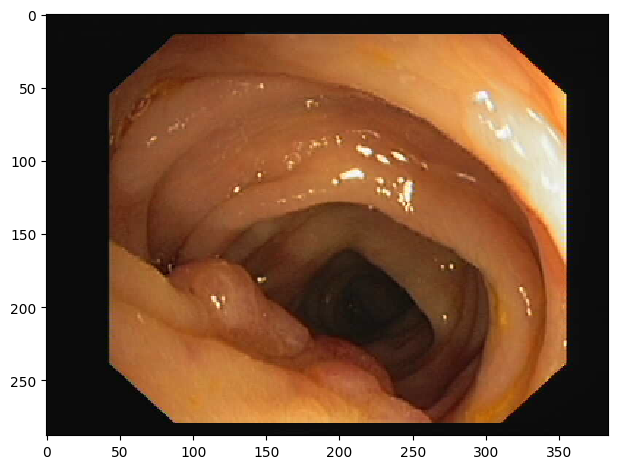

In [51]:
# showing original image

print(io.imshow("datasets/CVC_ClinicDB/images/train2019/1.png"))

In [59]:
# displaying boxes
# currently there are no boxes

print(pred[0].boxes)

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([], size=(0, 6))
cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: tensor([288, 384])
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


AxesImage(size=(288, 384))


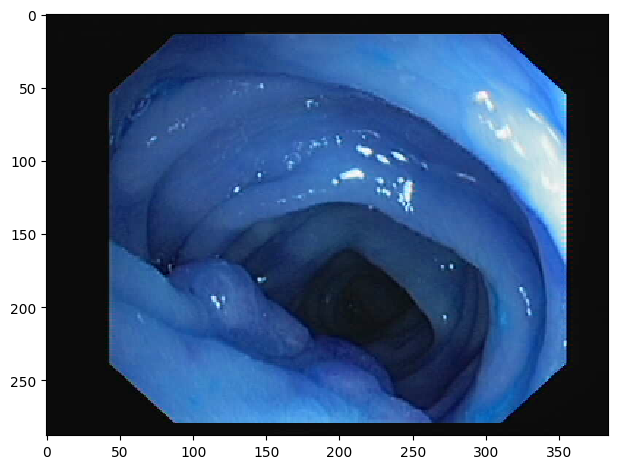

In [55]:
# plotting predicted outputs 

pred_plotted = pred[0].plot()

# was hoping using another image opener would yield different results...
# cv2.imshow("temp", pred_plotted)

# main questions: where are the boxes, and why is everything colorshifted to blue???? 
# yolov8 does color shifts as one of its data augmentations (https://docs.ultralytics.com/usage/cfg/#export) during training but this is predictions so it shouldn't happen...
print(io.imshow(pred_plotted))

In [45]:
# save the model weights
# default is .pt, which should be compatible with torch (looking at you Jarret)
model.export()

Ultralytics YOLOv8.0.81  Python-3.9.16 torch-2.0.0+cpu CPU

PyTorch: starting from runs\detect\yolov8n_cvc_clinicdb11\weights\best.pt with input shape (8, 3, 384, 384) BCHW and output shape(s) (8, 5, 3024) (5.9 MB)

TorchScript: starting export with torch 2.0.0+cpu...
TorchScript: export success  4.7s, saved as runs\detect\yolov8n_cvc_clinicdb11\weights\best.torchscript (11.8 MB)

Export complete (5.9s)
Results saved to C:\Users\LeonZha\Documents\Programming_Projects\USC_Classes\CSCI566\hidden-layer-cake\runs\detect\yolov8n_cvc_clinicdb11\weights
Predict:         yolo predict task=detect model=runs\detect\yolov8n_cvc_clinicdb11\weights\best.torchscript imgsz=384 
Validate:        yolo val task=detect model=runs\detect\yolov8n_cvc_clinicdb11\weights\best.torchscript imgsz=384 data=polyp_datasets.yaml 
Visualize:       https://netron.app


'runs\\detect\\yolov8n_cvc_clinicdb11\\weights\\best.torchscript'